# GG4257 - Urban Analytics: A Toolkit for Sustainable Urban Development
## Lab Workbook No 3: Geovisualization Techniques - Data Viz.
---
Dr Fernando Benitez -  University of St Andrews - School of Geography and Sustainable Development - Iteration 2024

# Objectives

By the end of this practical lab, you will be able to:

* Create summary descriptive statistics for numeric attributes
* Generate frequency tables
* Use aggregation functions
* Write a basic user function
* Convert between co-ordinate reference systems
* Create contextual statistics for geographic features using buffers
* Handle and Map big data sets using additional libraries and frameworks



> **GOOD ACADEMIC PRACTICE**: As always, The University policy on Good Academic Practice applies. There are probably many ways to address the challenges in here or part of them. You are free to do research and find relevant resources, like the documentation website, if you cited them correctly. But I strongly advise not to use AI tools, most importantly because you won't learn/practice as you are supposed to.
>
> If you still insist on using AI tools, you must cite any code or work you are taking/adapting from it. However, if cited correctly, your mark will be lower, and if not cited correctly, you risk incurring academic misconduct.
>
>  If you are not aware of **our academic misconduct policy**, kindly take a quick look (Pag 8. https://www.st-ndrews.ac.uk/policy/academic-policies-assessment-examination-and-award-good-academic-practice/good-academic-practice-guidance-for-students-frequently-asked-questions.pdf)


# Basic numeric summary statistics

In the first part of this practical, we will import some [Airbnb](http://insideairbnb.com/get-the-data.html) data for Amsterdam that was collected during July 2016. Adapted from (Singleton, 2017)
 

In [71]:
import pandas as pd

listings =pd.read_csv("data/listings.csv")

#Show column headings
listings.head()

id                            listing_url       scrape_id  \
0   9784567   https://www.airbnb.com/rooms/9784567  20160704013910   
1  13163805  https://www.airbnb.com/rooms/13163805  20160704013910   
2   3719167   https://www.airbnb.com/rooms/3719167  20160704013910   
3  13188367  https://www.airbnb.com/rooms/13188367  20160704013910   
4   4831606   https://www.airbnb.com/rooms/4831606  20160704013910   

  last_scraped                                               name  \
0   2016-07-04                             nice Room in Amsterdam   
1   2016-07-04        Best cost benefit room near a metro station   
2   2016-07-04  Nice  room in A´dam SE near nature & heart centre   
3   2016-07-04     Private room 15min metro ride from city center   
4   2016-07-04    Room in Amsterdam in a new house!! Free Bicycle   

                                             summary  \
0  nice Room 20 Min.to Amst.center 10 minutes wal...   
1  We (me and my wife) are constantly improving o...   
2  I offer a beautiful 19 sqm room in a house on ...   
3  The apartment is located a 15min ride from the...   
4  In Amsterdam Zuidoost (20 minutes to central s...   

                                               space  \
0                                                NaN   
1                                                NaN   
2  The location is close to the shops, public tra...   
3                                                NaN   
4                                           Smart tv   

                                         description experiences_offered  \
0  nice Room 20 Min.to Amst.center 10 minutes wal...                none   
1  We (me and my wife) are constantly improving o...                none   
2  I offer a beautiful 19 sqm room in a house on ...                none   
3  The apartment is located a 15min ride from the...                none   
4  In Amsterdam Zuidoost (20 minutes to central s...                none   

                               neighborhood_overview  ... review_scores_value  \
0              nice Park metro in front bus in front  ...                 8.0   
1                                                NaN  ...                 9.0   
2  A lot of different internationalities and cult...  ...                 9.0   
3                                                NaN  ...                10.0   
4                                                NaN  ...                 9.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN          Amsterdam                f   
1                f     NaN          Amsterdam                t   
2                f     NaN          Amsterdam                f   
3                f     NaN                NaN                f   
4                f     NaN          Amsterdam                f   

  cancellation_policy require_guest_profile_picture  \
0            flexible                             f   
1            flexible                             f   
2            moderate                             f   
3            moderate                             f   
4            moderate                             f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              3   
1                                f                              1   
2                                f                              1   
3                                f                              1   
4                                f                              1   

   reviews_per_month  
0               0.81  
1               4.00  
2               0.48  
3               1.62  
4               0.65  

[5 rows x 95 columns]

However, for this practical, we will subset these data to a limited set of variables; in the previous example, we used a list or Dict to define a new subset of columns; here, you have another method.

In [72]:
# Subset data
subset_listings = listings[['id', 
                            'neighbourhood_cleansed',
                            'latitude',
                            'longitude',
                            'property_type',
                            'room_type',
                            'bedrooms',
                            'price',
                            'number_of_reviews']]

# We need to do some cleaning...There are some weird characters $ and , then convert the outcome to a dtype numeric.
# I use multiple functions in one line, but the key is using .loc and replace., check this link for more information.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
subset_listings.loc[subset_listings.index, 'price'] = subset_listings['price'].replace('[\$,]', '', regex=True).astype(float)

# Remove any records that are not complete
subset_listings = subset_listings.dropna()

# Let's see the results.
subset_listings.head()

/var/folders/83/1x40589d0tn93j0bfb0vc2q80000gn/T/ipykernel_38724/2204633073.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_listings.loc[subset_listings.index, 'price'] = subset_listings['price'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/83/1x40589d0tn93j0bfb0vc2q80000gn/T/ipykernel_38724/2204633073.py:15: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  subset_listings.loc[subset_listings.index, 'price'] = subset_listings['price'].replace('[\$,]', '', regex=True).astype(float)


id neighbourhood_cleansed   latitude  longitude property_type  \
0   9784567           Bijlmer-Oost  52.323369   4.977730     Apartment   
1  13163805           Bijlmer-Oost  52.315635   4.978166     Apartment   
2   3719167           Bijlmer-Oost  52.316711   4.986618         House   
3  13188367           Bijlmer-Oost  52.321204   4.976630     Apartment   
4   4831606           Bijlmer-Oost  52.327270   4.967352         House   

      room_type  bedrooms  price  number_of_reviews  
0  Private room       1.0   95.0                  5  
1  Private room       1.0   60.0                  4  
2  Private room       1.0   45.0                 11  
3  Private room       1.0   35.0                  2  
4  Private room       1.0   39.0                 12

In [ ]:
subset_listings.dtypes

The simplest way to create a set of descriptive statistics is to use the **describe()** function which returns the minimum, maximum, first and third quartile, and the mean and median for each column. For non numeric columns (e.g. neighbourhood_cleansed),the frequencies of the top seven most frequent attributes are shown.

In [73]:
# Generate descriptive statistics
descriptive_stats = subset_listings.describe()
descriptive_stats

id      latitude     longitude      bedrooms         price  \
count  1.383700e+04  13837.000000  13837.000000  13837.000000  13837.000000   
mean   7.418371e+06     52.365572      4.889060      1.428344    132.830382   
std    4.225013e+06      0.015318      0.034319      0.888810    105.301712   
min    2.818000e+03     52.290402      4.763264      0.000000     10.000000   
25%    3.736210e+06     52.355850      4.865530      1.000000     89.000000   
50%    7.555967e+06     52.365217      4.886416      1.000000    115.000000   
75%    1.126715e+07     52.374953      4.907381      2.000000    150.000000   
max    1.382844e+07     52.428571      5.027689     10.000000   8616.000000   

       number_of_reviews  
count       13837.000000  
mean           15.416926  
std            29.831525  
min             0.000000  
25%             1.000000  
50%             6.000000  
75%            16.000000  
max           416.000000

In [74]:
descriptive_stats_non_numerical = subset_listings.describe(exclude='number')
descriptive_stats_non_numerical

neighbourhood_cleansed property_type        room_type
count                    13837         13837            13837
unique                      22            18                3
top     De Baarsjes - Oud-West     Apartment  Entire home/apt
freq                      2430         10954            11157

# Frequency tables

Another common fundamental analysis task is to create a frequency table for a categorical variable - for example, the number of listings per neighbourhood. This can be achieved using the value_counts() function, which prints a list of the unique attributes and the frequency of these observations.


In [ ]:
neighborhood_counts = subset_listings['neighbourhood_cleansed'].value_counts()
neighborhood_counts

It is also possible to create cross-tabulations; showing the frequency of two attributes - here we look at neighborhood and bedrooms:

In [ ]:
# Here for the complete doc https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html 
cross_tabulation = pd.crosstab(subset_listings['neighbourhood_cleansed'], subset_listings['bedrooms'])
cross_tabulation

In [ ]:
cross_tabulation.info()

# Create aggregations and summary statistics

I have shown how you can use various descriptive summary functions for single columns, however, it is also possible to combine these with other functions which make these calculations within aggregations. This is especially useful for geographic application where you can create summaries by a defined area. In the following example I will use the function groupby() to find out what the mean price is by neighborhood:


In [ ]:
Sum_by_area = subset_listings.groupby('neighbourhood_cleansed')['price'].mean().reset_index()
Sum_by_area

>The `reset_index()` function in pandas is used to reset the index of a DataFrame. In Pandas when you apply the `group_by()` the resulting DataFrame often has a hierarchical index based on the grouping columns, making it a MultiIndex DataFrame., usually that is an issue.

In our analysis, we have so far only examined the average price. However, if we want to generate several different statistics for each aggregation, we can do so by creating a custom function. Throughout the labs, we have used various functions, some of which are built into the base version of Python, while others are available through libraries that we have loaded.

In this example, we create a new function called `data_description`, which calculates a mean and counts the number of records - these are stored within a new object called "stats", which is returned when the function is run.

In [ ]:
# data_description function
def data_description(x):
    stats = {'M': x.mean(), 'S': len(x)}
    return stats

In [ ]:
result = data_description(subset_listings.price)
print(result)

# Challenge 1

**What happens if you have non-numerical attributes?**

Please extend the `data_description` function to only accept numerical columns and calculate mean and counts. The outcome should be a table with Mean and Counts per Column.

> Tip: Check this function in pandas to filter the numerical values. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html#pandas.DataFrame.select_dtypes
> Here some extra resources of creating function in python https://www.geeksforgeeks.org/python-functions/?ref=lbp


In [ ]:

def data_description(x):

    numbers = x.select_dtypes(include=['number'])

    means = numbers.mean()
    counts = numbers.count()
    
    stats = pd.DataFrame({'Mean': means, 'Count': counts})
    return stats

In [ ]:
result = data_description(subset_listings)
result

# Spatial summary measures

So far we have considered a pre-defined geography in the previous example: neighborhoods. However, a common spatial analysis task is to create descriptive statistics related to the context of features. This task will typically require a buffer to be created around a feature and then data aggregated and summarized within the buffers.

First we will import a spatial data file that relates to [historic building locations](http://maps.amsterdam.nl/open_geodata/):


In [68]:
import geopandas as gpd

# Recall here how to read external files in geopandas. https://geopandas.org/en/stable/docs/user_guide/io.html
historic_buildings = gpd.read_file("data/historic_buildings.geojson", driver="GeoJSON")

historic_buildings.head()

Naam Hoofdgroep Functie  \
0             Atheneum Illustre 1632   Openbaar           
1                     Oude Kerk 1306    Religie    Kerk   
2  Windmolenzijdepoorthuis 1300-1380   Militair   Poort   
3          Haarlemmerpoort 1425-1579   Militair   Poort   
4          Bindwijkerpoort 1340-1425   Militair   Poort   

                    Foto Website                        Opmerking  Begin  \
0  Atheneum Illustre.jpg          Bron: Gerrit de Broen 1774-1782   1632   
1          Oude kerk.jpg            Bron: Cornelis Anthonisz 1544   1306   
2                                                                   1300   
3    Haarlemmerpoort.jpg            Bron: Cornelis Anthonisz 1544   1425   
4                                                                   1340   

   Eind                  geometry  
0     0  POINT (4.89500 52.36993)  
1     0  POINT (4.89799 52.37431)  
2  1380  POINT (4.89673 52.37705)  
3  1579  POINT (4.89469 52.37891)  
4  1425  POINT (4.89102 52.36897)

Here is why I love python and GeoPandas, as the external file is GeoJSON including the geometry attribute, the result is already a spatial dataframe. That will be different in R where you need to locate the rows. 

In [69]:
historic_buildings.explore()

In [70]:
# We need to create a GeoDataFrame from the subset_listings
geometry = gpd.points_from_xy(subset_listings['longitude'], subset_listings['latitude'])
geo_listings = gpd.GeoDataFrame(subset_listings, geometry=geometry, crs=historic_buildings.crs)
geo_listings.explore()

NameError: name 'subset_listings' is not defined

In [ ]:
print(historic_buildings.crs)
print(geo_listings.crs)

Before making any spatial analysis we need to project the data

In [ ]:
projected_historic_buildings = historic_buildings.to_crs('EPSG:28992')
projected_geo_listings = geo_listings.to_crs('EPSG:28992')
print(projected_historic_buildings.crs)
print(projected_geo_listings.crs)

Now, lets make a buffer of 200m from all the historic buildings.

In [ ]:
historic_buffers = projected_historic_buildings.buffer(200)
historic_buffers.explore()

In [ ]:
historic_buffers.head()

This outcome does not have an ID, so we can easily create one. Also, the outcome is a GeoSeries which cannot be used in a buffer analysis. You can transform it using the geometry values.

In [ ]:
historic_buffers = gpd.GeoDataFrame(geometry=historic_buffers, crs = 'EPSG:28992')

In [ ]:
historic_buffers['buffer_id'] = range(len(historic_buffers))
historic_buffers.head()

Running the spatial join to get the number of listings and their attributes per buffer area. More info here: https://geopandas.org/en/stable/docs/user_guide/mergingdata.html

In [ ]:
spatial_result =  projected_geo_listings.sjoin(historic_buffers, how="inner", predicate='intersects')
spatial_result.head()

To make things easier we can filter the buffer with more listings.

In [ ]:
listings_per_buffer = spatial_result.groupby('buffer_id').size().reset_index(name='listings_per_buffer')
listings_per_buffer

And now we can pick one of the buffer areas. For instance the 194.

In [ ]:
filtered_row = spatial_result[spatial_result['buffer_id'] == 194]
filtered_row.explore()

With this process now you can explore the prices, age, and other attributes related to the historic buldings and the AirBnb listings in Amsterdam., A useful excersice we can do is to plot for the random buffer area, plot th listings included in the areas and get the descritive estadistics. For example:

In [ ]:
historic_buffers.head()

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

# We can plot the buffer areas and its listings
filtered_buffer = historic_buffers[historic_buffers['buffer_id'] == 194].plot(ax=ax, color="#D4D4D4", alpha=0.5)

# We can overlay all listings within the filtered buffer
filtered_row.plot(ax=ax, marker='o', color="#FF4500", markersize=5, alpha=0.7)

# Make the plot nicer
ax.set_title("Listings within Buffer - ID 194")
plt.show()

# Plot a histogram of the 'price' attribute
plt.figure(figsize=(6, 4))
filtered_row['price'].plot(kind='hist', bins=20, color='#FF4500', alpha=0.7)
plt.title('Distribution of Listings Prices within Buffer - ID 194')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [ ]:
filtered_row.explore("price", cmap='Oranges', tiles='Esri_WorldGrayCanvas', zoom_start=17)
#See here all the list of Basemap ( tiles) options: https://leaflet-extras.github.io/leaflet-providers/preview/

# Folium 

Folium is a helpful library that facilitates the creation of interactive maps in Python. It allows you to visualize data on an interactive leaflet map, which can be easily manipulated. With Folium, you can bind data to a map for choropleth visualizations, and pass rich vector, raster and HTML visualizations as markers on the map. You can learn more about this library by visiting https://python-visualization.github.io/folium/latest/.




In [157]:
import folium
from folium import plugins
from folium.plugins import MeasureControl
from branca.colormap import linear
from branca import colormap
from branca import colormap as cm

In [ ]:
lon, lat = -38.625, -12.875

zoom_start = 8

folium.Map(location=[lat, lon], tiles="OpenStreetMap", zoom_start=zoom_start)

In [ ]:
folium.Map(location=[lat, lon], tiles="Cartodb Positron", zoom_start=zoom_start)


In [ ]:
folium.Map(location=[lat, lon], tiles="Cartodb dark_matter", zoom_start=zoom_start)

https://leaflet-extras.github.io/leaflet-providers/preview/ Here you can get the list of all the supported tiles

In [48]:
filtered_row.head()

NameError: name 'filtered_row' is not defined

In [ ]:
m = folium.Map([52.368152,4.897582], zoom_start=10)
location=filtered_row[["latitude","longitude"]]

plugins.MarkerCluster(location).add_to(m)
m

# Clic the cluster.

In [ ]:
folium.plugins.HeatMap(filtered_row[["latitude","longitude"]]).add_to(m)
m

# Challenge 2

Now is your turn to find, read, process and then make a comprehensive descriptive statistics analysis based on the previous resources and others you might need to look at. Create insightful visualizations combining both maps and charts to convey meaningful information about a chosen city.

1. Define a problem within the urban environment and choose a dataset related to urban life or city dynamics. This could include data on crime rates, housing prices, transportation, demographics, or any other urban-related dataset.
2. Get the data ideally using an **API, or web services**. But it's fine if you need to download the data. Describe why you had to use the traditional  method.
3. Work with the data cleaning and pre-processing, check for missing values, convert data types, and perform any other necessary preprocessing steps. You have the code for that in this and previous labs.
4. Use Pandas to calculate descriptive statistics such as `mean`, `median`, `standard deviation`, and other relevant measures. Explore `correlations` between different variables (Include at least one `univariate` and `bivariate` plots) 
6. Create at least one (or more) interactive map to visualize spatial aspects of the data. For example, plot crime rates across different neighbourhoods or visualize housing prices.
7. Complement with additional charts (line charts, bar charts, etc.) to extend the map and highlight key trends or patterns in the data.
8. As always, document well what you are doing and how you use `descriptive statistics and map visualizations` to extract insights from the data.
> You could try explaining any observed patterns, trends, or correlations, whether they are spatial or non-spatial. **Keep in mind** the defined problem and whether your analysis provides the required insights (Your conclusion could be that you need more data or another type of analysis)

# Version 1 Test

In [8]:
import urllib.request
import requests
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

## Problem
examining the relationship between job unavailability and hightened crime rates


In [218]:
data = pd.read_csv("/Users/magnusburnet/Desktop/UA Repo/Lab 3/data/London_data.csv")

In [219]:
data.shape

(660, 64)

In [220]:
# Subset data
subset = data[['Unnamed: 1',
               'Unnamed: 2',
                            'Unnamed: 3',
                            'Unemployment rate.4',
                            'Crime rate - Index.4',
                            'Subjective well-being average score.4',
                            ]]

In [223]:
london_data.shape

(659, 6)

In [222]:
#rename collums and drop first row
london_data = subset.rename(columns={'Unnamed: 1': 'WardCode','Unnamed: 2':'Wards','Unnamed: 3': 'Borough', 'Unemployment rate.4': 'Unemployment_Rate', 'Crime rate - Index.4': 'Crime_Rate','Subjective well-being average score.4': 'Wellbeing score'})
london_data = london_data.iloc[1:]
london_data.head()

WardCode           Wards               Borough  Unemployment_Rate  \
1  E09000001  City of London        City of London                8.6   
2  E05000026           Abbey  Barking and Dagenham              -11.2   
3  E05000027          Alibon  Barking and Dagenham              -15.1   
4  E05000028       Becontree  Barking and Dagenham              -14.3   
5  E05000029  Chadwell Heath  Barking and Dagenham              -10.3   

   Crime_Rate  Wellbeing score  
1        17.2              0.0  
2       -18.4              6.1  
3        -9.2             -4.7  
4       -13.1             -4.8  
5        -6.1             -4.8

In [224]:
london_data.isnull().sum() #Checking for missing values

WardCode             1
Wards                1
Borough              1
Unemployment_Rate    1
Crime_Rate           1
Wellbeing score      1
dtype: int64

In [ ]:
# Univariate analysis - Distribution plot for unempoyment rates across London
plt.figure(figsize = (10,6))
sns.distplot(london_data.Unemployment_Rate, color = 'r')
plt.title('Unemplyment Rate Distribution', size=18)
plt.xlabel('Unemployment Rate', size=14)
plt.ylabel('Density', size=14)
plt.show()
#Shows negatively skewed distribution of unemplyment rate

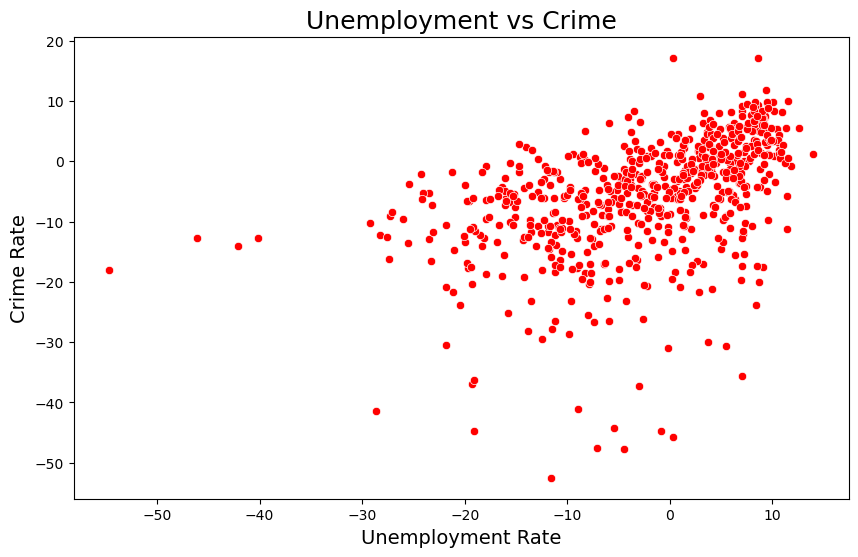

In [118]:
# Bivariate analysis - Plot a scatterplot showing the relationship between Unemployment rate and Crime rates in London
plt.figure(figsize = (10,6))
sns.scatterplot(x='2013 Unemployment Rate',y='2013 Crime Rate',color='r', data = london_data)
plt.title('Unemployment vs Crime',size=18)
plt.xlabel('Unemployment Rate', size=14)
plt.ylabel('Crime Rate', size=14)
plt.show()

In [142]:
#Link to Borough shapefile data - data only found available as downloadable file
boroughs = gpd.read_file("/Users/magnusburnet/Desktop/UA Repo/Lab 3/data/London-wards-2018_ESRI/London_Ward.shp")

In [205]:
boroughs.head()

NAME   GSS_CODE              DISTRICT  LAGSSCODE  \
0       Chessington South  E05000405  Kingston upon Thames  E09000021   
1  Tolworth and Hook Rise  E05000414  Kingston upon Thames  E09000021   
2              Berrylands  E05000401  Kingston upon Thames  E09000021   
3               Alexandra  E05000400  Kingston upon Thames  E09000021   
4                Beverley  E05000402  Kingston upon Thames  E09000021   

   HECTARES  NONLD_AREA                                           geometry  
0   755.173         0.0  POLYGON ((516401.596 160201.802, 516407.302 16...  
1   259.464         0.0  POLYGON ((519552.998 164295.600, 519508.096 16...  
2   145.390         0.0  POLYGON ((518107.499 167303.399, 518114.301 16...  
3   268.506         0.0  POLYGON ((520336.700 165105.498, 520332.198 16...  
4   187.821         0.0  POLYGON ((521201.203 169275.505, 521204.303 16...

In [206]:
subset_boroughs = boroughs[['NAME', 
                            'GSS_CODE',
                            'DISTRICT',
                            'LAGSSCODE',
                            'geometry',
                            ]]

# Remove any records that are not complete

In [ ]:
subset_boroughs = subset_boroughs.dropna()

In [167]:
subset_boroughs.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [213]:
comparison_result = subset_boroughs.compare(london_data)

print(comparison_result)

TypeError: can only compare 'GeoDataFrame' (not 'DataFrame') with 'GeoDataFrame'

In [210]:
merged = pd.merge(london_data, subset_boroughs, on="GSS_CODE")

In [207]:
#Merge borough and london data
merged = pd.merge(london_data, subset_boroughs, left_on="Wards", right_on="NAME")


In [201]:
merged.head()

GSS_CODE_x   Wards               Borough  Unemployment_Rate  Crime_Rate  \
0  E05000026   Abbey  Barking and Dagenham              -11.2       -18.4   
1  E05000026   Abbey  Barking and Dagenham              -11.2       -18.4   
2  E05000455   Abbey                Merton                9.6         1.2   
3  E05000455   Abbey                Merton                9.6         1.2   
4  E05000027  Alibon  Barking and Dagenham              -15.1        -9.2   

   Wellbeing score    NAME GSS_CODE_y              DISTRICT  LAGSSCODE  \
0              6.1   Abbey  E05000455                Merton  E09000024   
1              6.1   Abbey  E05000026  Barking and Dagenham  E09000002   
2             -5.9   Abbey  E05000455                Merton  E09000024   
3             -5.9   Abbey  E05000026  Barking and Dagenham  E09000002   
4             -4.7  Alibon  E05000027  Barking and Dagenham  E09000002   

                                            geometry  
0  POLYGON ((525122.603 170480.900, 525185.398 17...  
1  POLYGON ((544735.196 184076.498, 544726.596 18...  
2  POLYGON ((525122.603 170480.900, 525185.398 17...  
3  POLYGON ((544735.196 184076.498, 544726.596 18...  
4  POLYGON ((547932.400 184916.598, 547944.800 18...

In [211]:

merged_GDF = gpd.GeoDataFrame(merged, crs="EPSG:27700", geometry='geometry')

In [190]:
merged_GDF.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 483 entries, 0 to 482
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GSS_CODE           483 non-null    object  
 1   Borough            483 non-null    object  
 2   Unemployment_Rate  483 non-null    float64 
 3   Crime_Rate         483 non-null    float64 
 4   Wellbeing score    483 non-null    float64 
 5   NAME               483 non-null    object  
 6   DISTRICT           483 non-null    object  
 7   LAGSSCODE          483 non-null    object  
 8   geometry           483 non-null    geometry
dtypes: float64(3), geometry(1), object(5)
memory usage: 37.7+ KB


In [212]:
merged_GDF.explore()

# Version 2 test

In [ ]:
https://data.london.gov.uk/download/jobs-and-job-density-borough/79e85749-e38d-4bb6-8327-c60c6be27222/Jobs_and_Job_Density.csv

In [32]:
import urllib.request
import requests
import pandas as pd 
import geopandas as gpd

In [ ]:
allotments = gpd.read_file("/Users/magnusburnet/Desktop/UA Repo/Lab 3/data/gla-allotment-locations-tab") #read file containtinglocations of allotments in london
allotments.head()

In [ ]:
allotments.explore()

In [77]:
url = "https://maps.london.gov.uk/gla/rest/services/opendata/maplondon/MapServer/0"
response = requests.get(url)
response

<Response [200]>

In [81]:
jobs = pd.read_csv("https://data.london.gov.uk/download/jobs-and-job-density-borough/79e85749-e38d-4bb6-8327-c60c6be27222/Jobs_and_Job_Density.csv")

In [82]:
jobs.head() 

code                  area  year  number_of_jobs  job_density
0  E09000001        City of London  2000          361000        67.10
1  E09000002  Barking and Dagenham  2000           57000         0.56
2  E09000003                Barnet  2000          138000         0.67
3  E09000004                Bexley  2000           76000         0.55
4  E09000005                 Brent  2000          122000         0.67

In [21]:
import pandas as pd
data = pd.read_csv('https://data.london.gov.uk/download/recorded_crime_summary/268c37c6-9022-4130-8e43-7bb41ee89f2d/MPS%20Borough%20Level%20Crime%20%28most%20recent%2024%20months%29.csv')

In [24]:
data.head()

MajorText                        MinorText  \
0  Arson and Criminal Damage                            Arson   
1  Arson and Criminal Damage                  Criminal Damage   
2                   Burglary  Burglary Business and Community   
3                   Burglary                Domestic Burglary   
4              Drug Offences                 Drug Trafficking   

     LookUp_BoroughName  202202  202203  202204  202205  202206  202207  \
0  Barking and Dagenham       4       3       5       6       5       9   
1  Barking and Dagenham     110     116     126     119     142     113   
2  Barking and Dagenham      29      30      17      16      23      18   
3  Barking and Dagenham      67      77      81      75      52      46   
4  Barking and Dagenham      11      20      15      17      17      18   

   202208  ...  202305  202306  202307  202308  202309  202310  202311  \
0       5  ...       5       2       5       8       5       4       3   
1     133  ...     109     126     136     117     130      97      90   
2      30  ...      28      30      25      33      41      30      22   
3      75  ...      50      65      50      75      86      71      64   
4      12  ...      26      36      21      16      20      38      23   

   202312  202401  Total  
0       4       4     99  
1     126     128   2782  
2      20      32    643  
3      52      67   1618  
4      20      27    466  

[5 rows x 28 columns]

In [23]:
data['Total'] = data.loc[:, '202202':'202401'].sum(axis=1)

In [76]:
total_crime = data[["MajorText","LookUp_BoroughName","Total"]]
total_crime.head()

MajorText    LookUp_BoroughName  Total
0  Arson and Criminal Damage  Barking and Dagenham     99
1  Arson and Criminal Damage  Barking and Dagenham   2782
2                   Burglary  Barking and Dagenham    643
3                   Burglary  Barking and Dagenham   1618
4              Drug Offences  Barking and Dagenham    466

In [75]:
descriptive_stats = total_crime.describe()
descriptive_stats

Total
count   1574.000000
mean    1146.440915
std     2706.603071
min        1.000000
25%       15.000000
50%      122.500000
75%     1124.750000
max    47996.000000

In [41]:
grouped_crime = total_crime.groupby('LookUp_BoroughName').sum().reset_index()
grouped_crime = grouped_crime.rename(columns={'LookUp_BoroughName': 'Borough','Total': 'Total_crime'})

/var/folders/83/1x40589d0tn93j0bfb0vc2q80000gn/T/ipykernel_38724/1939979688.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_crime = total_crime.groupby('LookUp_BoroughName').sum().reset_index()


In [42]:
grouped_crime.head()

Borough  Total_crime
0  Barking and Dagenham        43561
1                Barnet        57403
2                Bexley        33039
3                 Brent        62463
4               Bromley        46892

In [43]:
Merged = pd.merge(grouped_crime, allotments, on="Borough") #merge the data by Borough
Merged.head()

Borough  Total_crime  GLA_ID Borough_Ref           Name  \
0  Barking and Dagenham        43561       6           1  Field Gardens   
1  Barking and Dagenham        43561      14           2  Temple Avenue   
2  Barking and Dagenham        43561       7           3      Frizlands   
3  Barking and Dagenham        43561      12           4   Manning Road   
4  Barking and Dagenham        43561      13           5     Reede Road   

  Location SuppliedPostcode NearestPostcode  \
0                                   RM6 6UB   
1                                   RM7 0EX   
2                                  RM10 7HS   
3                                  RM10 9HL   
4                                  RM10 8GF   

                                        Organisation Facilities Grade  \
0  Chadwell Heath Allotment and Horticultural Soc...                    
1  Becontree Heath Allotment and Horticultural So...                    
2  Becontree Horticultural and Allotment Association                    
3  Becontree Horticultural and Allotment Association                    
4  Becontree Horticultural and Allotment Association                    

  Comments  Easting  Northing  Latitude  Longitude  \
0            547942    188143  0.133420  51.572692   
1            549270    187485  0.152281  51.566437   
2            549722    186107  0.158216  51.553930   
3            549199    184398  0.149961  51.538713   
4            549666    184907  0.156897  51.543164   

                        geometry  
0  POINT (547942.190 188142.530)  
1  POINT (549269.570 187485.200)  
2  POINT (549721.920 186106.630)  
3  POINT (549199.430 184397.640)  
4  POINT (549665.800 184906.730)

# Dealing with big data sets

You have likely noticed the difficulties we face when attempting to plot data using traditional libraries with built-in mapping representation methods. Every time a new variable is loaded, your computer's memory pool becomes increasingly crowded. As spatial data scientists, we may end up consuming all of our available RAM, causing Jupyter to become stuck. Additionally, the notebooks become quite large in size, and it becomes difficult to push the final version into platforms like GitHub.

In such cases, desktop tools are typically more efficient when it comes to manipulating and handling a certain amount of data, but they, too, can become stuck. These programs, such as `QGIS`, `ArcGIS`, and even `R`, struggle to handle large datasets, especially those with over a million records. Therefore, we need to consider alternative methods for processing and plotting data.

> If you took the GG3209 module last semestre you will be familiar with this section

# Lonboard

Now, we can download big data sets related to reported crime in the UK. This data can be found in the following link https://data.police.uk/data/, you can select a range of times and then the force that you would like to get the data. For this example, we can download the reported crime from **Jan 2023 to Dec 2023** collected by the Metropolitan Police Service.

> Please **go to this website and download the data**, place the zip file in your data folder and keep working with the notebook. Once you unzip and merge all the files from Jan to Dec 2023, you should get approximately 1.135.031 records.

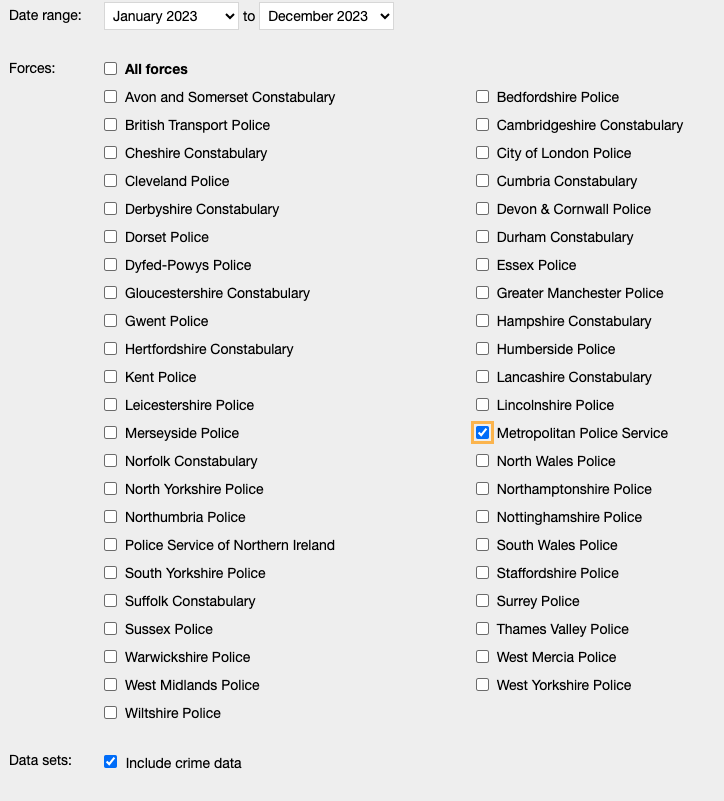



We need to unzip, go through all the sub-directories and then merge all the CSV files included.



In [ ]:
import zipfile
import os
import pandas as pd

# Unzip the file. YOU NEED TO UPDATE THIS PATH based on where you place the zip file.
with zipfile.ZipFile('/Users/magnusburnet/Desktop/UA Repo/Lab 3/data/5990abe009b7d3c691315fa106efb78027d13c95', 'r') as zip_ref:
    zip_ref.extractall('/Users/magnusburnet/Desktop/UA Repo/Lab 3/data/5990abe009b7d3c691315fa106efb78027d13c95')

# List all .csv files in subdirectories
# Here we use https://docs.python.org/dev/library/pathlib.html and walk https://docs.python.org/dev/library/os.html#os.walk
csv_files = [os.path.join(root, file) for root, dirs, files in os.walk('data/Lab3/CrimeData') for file in files if file.endswith('.csv')]

# If you notice, the files are included in separate folders; we need to merge (concat) those.
crimes_london = pd.concat([pd.read_csv(csv_file) for csv_file in csv_files], ignore_index=True)

crimes_london.head()

In [2]:
import zipfile
import os
import pandas as pd

# List all .csv files in subdirectories
# Here we use https://docs.python.org/dev/library/pathlib.html and walk https://docs.python.org/dev/library/os.html#os.walk
csv_files = [os.path.join(root, file) for root, dirs, files in os.walk('/Users/magnusburnet/Desktop/UA Repo/Lab 3/data/5990abe009b7d3c691315fa106efb78027d13c95') for file in files if file.endswith('.csv')]

# If you notice, the files are included in separate folders; we need to merge (concat) those.
crimes_london = pd.concat([pd.read_csv(csv_file) for csv_file in csv_files], ignore_index=True)

crimes_london.head()

Crime ID    Month  \
0  260968c6eec09d2ca5a0a895453cbeba1d429eb662022b...  2023-10   
1  8fdc14d25654b44657d67659b4699bc8e52c50666f18f2...  2023-10   
2                                                NaN  2023-10   
3                                                NaN  2023-10   
4                                                NaN  2023-10   

                   Reported by                 Falls within  Longitude  \
0  Metropolitan Police Service  Metropolitan Police Service  -0.534527   
1  Metropolitan Police Service  Metropolitan Police Service   0.853458   
2  Metropolitan Police Service  Metropolitan Police Service   0.134947   
3  Metropolitan Police Service  Metropolitan Police Service   0.140194   
4  Metropolitan Police Service  Metropolitan Police Service   0.140194   

    Latitude                  Location  LSOA code                  LSOA name  \
0  50.827329  On or near Banks Gardens  E01034816                  Arun 004F   
1  51.126012  On or near Augustus Walk  E01024008               Ashford 009D   
2  51.588063     On or near Mead Grove  E01000027  Barking and Dagenham 001A   
3  51.582356    On or near Hatch Grove  E01000027  Barking and Dagenham 001A   
4  51.582356    On or near Hatch Grove  E01000027  Barking and Dagenham 001A   

                     Crime type  \
0                         Drugs   
1  Violence and sexual offences   
2         Anti-social behaviour   
3         Anti-social behaviour   
4         Anti-social behaviour   

                           Last outcome category  Context  
0  Investigation complete; no suspect identified      NaN  
1  Investigation complete; no suspect identified      NaN  
2                                            NaN      NaN  
3                                            NaN      NaN  
4                                            NaN      NaN

You should have more than 1M of records.

In [3]:
crimes_london.shape

(1135031, 12)

In [232]:
crimes_london.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')

Let's filter the requiered columns, and then geo-locate the outcome.

In [4]:
subset_crimes = crimes_london[['Reported by', 
                            'Longitude',
                            'Latitude',
                            'LSOA code',
                            'LSOA name',
                            'Crime type',
                           ]]

# Remove any records that are not complete
subset_crimes = subset_crimes.dropna()
# We need a crime_id attribute.

subset_crimes['crime_id'] = range(len(subset_crimes))


In [5]:
subset_crimes.head()

Reported by  Longitude   Latitude  LSOA code  \
0  Metropolitan Police Service  -0.534527  50.827329  E01034816   
1  Metropolitan Police Service   0.853458  51.126012  E01024008   
2  Metropolitan Police Service   0.134947  51.588063  E01000027   
3  Metropolitan Police Service   0.140194  51.582356  E01000027   
4  Metropolitan Police Service   0.140194  51.582356  E01000027   

                   LSOA name                    Crime type  crime_id  
0                  Arun 004F                         Drugs         0  
1               Ashford 009D  Violence and sexual offences         1  
2  Barking and Dagenham 001A         Anti-social behaviour         2  
3  Barking and Dagenham 001A         Anti-social behaviour         3  
4  Barking and Dagenham 001A         Anti-social behaviour         4


After the initial pre-processing, you have significantly less amount of data records. 







In [6]:
subset_crimes.shape

(1111443, 7)

In [9]:
geometry = gpd.points_from_xy(subset_crimes['Longitude'], subset_crimes['Latitude'])
geo_crimes = gpd.GeoDataFrame(subset_crimes, geometry=geometry, crs='EPSG:4326')
geo_crimes.head()

Reported by  Longitude   Latitude  LSOA code  \
0  Metropolitan Police Service  -0.534527  50.827329  E01034816   
1  Metropolitan Police Service   0.853458  51.126012  E01024008   
2  Metropolitan Police Service   0.134947  51.588063  E01000027   
3  Metropolitan Police Service   0.140194  51.582356  E01000027   
4  Metropolitan Police Service   0.140194  51.582356  E01000027   

                   LSOA name                    Crime type  crime_id  \
0                  Arun 004F                         Drugs         0   
1               Ashford 009D  Violence and sexual offences         1   
2  Barking and Dagenham 001A         Anti-social behaviour         2   
3  Barking and Dagenham 001A         Anti-social behaviour         3   
4  Barking and Dagenham 001A         Anti-social behaviour         4   

                    geometry  
0  POINT (-0.53453 50.82733)  
1   POINT (0.85346 51.12601)  
2   POINT (0.13495 51.58806)  
3   POINT (0.14019 51.58236)  
4   POINT (0.14019 51.58236)

To plot more than 1 million points, traditional methods are not a good choice. Instead, we can use advanced libraries like [lonboard](https://developmentseed.org/lonboard/latest/) to create a layer variable that utilizes the `geo_crimes` and plot it on an interactive map. This library offers two methods: `viz(gdf)` - a quick method to plot big datasets, and `ScatterplotLayer` - a method that provides more control over the layer's appearance. With this method, we can create a `layer` and customize its visualization using other methods in the library. Additionally, we can load several layers, including lines and polygons.

>Uncomment and run the next line once you install lonboard. Ideally this libary should be part of the UA environment we have or we can run the same line in another terminal, before lauching Jupyter.

In [241]:
#pip install lonboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.6/608.6 kB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 6.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 8.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.1/27.1 MB 8.7 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.4/395.4 kB 6.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 7.6 MB/s eta 0:00:00:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: matplotlib
    Found existing installation:

In [10]:
from lonboard import viz
viz(geo_crimes)

Map(layers=[ScatterplotLayer(table=pyarrow.Table
Reported by: string
Longitude: double
Latitude: double
LSOA c…

You are mapping more than 1M of records, if you want you can try that in QGIS or R and let me know the results

In [ ]:
from lonboard import Map, ScatterplotLayer

layer = ScatterplotLayer.from_geopandas(geo_crimes)
map = Map(layers=[layer], _height=500)
map

if you get an error, go to the documentation website and see what are you missing: https://developmentseed.org/lonboard/latest/api/layers/scatterplot-layer/

## Customizing the Layer

Now, we can customize the previous layer by plotting by `Crime type` in an initial attempt to unhide any spatial pattern. Let's initially check how many categories we have in this `Crime type` column.


In [ ]:
crime_type = geo_crimes['Crime type'].value_counts()
crime_type

In [ ]:
import seaborn as sns
geo_crimes.groupby('Crime type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

We can see that `Violence and sexual offences ` are the Crime Types with more reports. now, let's see if we can see any spatial pattern by plotting those categories in our previously loaded map. We need to assign a colour to each crime type to do this. We can do that by creating an array of all the unique categories.

In [ ]:
categories = geo_crimes['Crime type'].unique()
colors = sns.color_palette("bright", len(categories))
colors

Now using the same principle, we can use Numpy to create a matrix that group every `Crime type` with its correspondant `color code. ` This code will use the coding `RGBA(Red, Green, Blue,Alpha)` the last value corresponde to transparency.

In [ ]:
# Get unique categories
categories = geo_crimes['Crime type'].unique()

# colour seaborn's "tab10" color palette
colors = sns.color_palette("bright", len(categories))

# We create a dictionary to map categories to colours
color_dict = dict(zip(categories, colors))
color_dict

With this new array filled of the code colours we need per Crime type category. We can then use the layer. properties, e.g, `radius_scale`, `opacity`, and `get_fill_color`. You need to coe back to the map to see the customised layer in the map we plot previously.

In [ ]:
import numpy as np
color_array = np.array([tuple(np.append(
    np.multiply(
        color_dict.get(x, (0, 0, 0)), 255).astype(int), 255)) 
                        for x in geo_crimes['Crime type']],
                       dtype=np.uint8)
color_array

In [ ]:
layer.radius_scale = 40
layer.opacity = 0.05
layer.get_fill_color = color_array

> to see the updated and coloured map you need to scroll up and see the plot map we previously created.

The Metropolitan Police Service collects data from multiple areas, so the map includes data from areas outside London; we could define a new bounding box to focus only on the Central London area.

In [ ]:
geo_crimes.total_bounds

By using the tool https://norbertrenner.de/osm/bbox.html to get the precise boundary box you need to spatially filter your analysis and remove any outlier rows that are not located in the area of interest. 

In [ ]:
import shapely
ld_bbox = [-0.591,51.285,0.381,51.678] # London B. Box
geo_crimes_london = geo_crimes[geo_crimes.intersects(shapely.box(*ld_bbox))]
geo_crimes_london.shape

In [ ]:
layer = ScatterplotLayer.from_geopandas(geo_crimes_london)
map = Map(layers=[layer], _height=500)
map

# PyDeck

deck.gl is a **WebGL-powered** framework for visual exploratory data analysis of large datasets. You can install the entire framework on you computer an run it locally, which will be the rigth way if you are creating an app from scratch. Here we will use PyDeck, which is a set of Python bindings for making spatial visualizations with **deck.gl**, optimized for a Jupyter environment. See the documentation: https://pydeck.gl/

> First, we need to install the library in our UTA environment, something you are already familiar with. Uncomment the next code cell and run it only once.


In [ ]:
#pip install pydeck

If you have issues installing it, please visit: https://pydeck.gl/installation.html or ask for an appoinment to get extra help.

In [ ]:
import pydeck as pdk

# 2014 locations of car accidents in the UK
UK_ACCIDENTS_DATA = ('https://raw.githubusercontent.com/uber-common/'
                     'deck.gl-data/master/examples/3d-heatmap/heatmap-data.csv')

#This data has already been curated and adapted to this example. In the real world, you need to do the data cleaning and pre-processing part.

In [ ]:
# Define a layer to display on a map
layer = pdk.Layer(
    'HexagonLayer',
    UK_ACCIDENTS_DATA,
    get_position=['lng', 'lat'],
    auto_highlight=True,
    elevation_scale=50,
    pickable=True,
    elevation_range=[0, 3000],
    extruded=True,                 
    coverage=1)

In [ ]:
# Set the viewport location, see here for more properties https://pydeck.gl/view_state.html?highlight=viewstate#pydeck.bindings.view_state.ViewState
view_state = pdk.ViewState(
    longitude=-1.415,
    latitude=52.2323,
    zoom=6,
    min_zoom=5,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)

In [ ]:
# Render
r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.to_html('MyGeoApp.html')
# NOTE: You are creating an HTML ( website with this app) so you can see them out of the Jupyter environment. 

# Challenge 3

1. Go to https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data 
2. Get the data for Motor Vehicle Collisions - Crashes Jan 2024. The dataset contains 2.06 M of records.
3. Use the API endpoint to map the data (e.g. https://data.cityofnewyork.us/resource/h9gi-nx95.json) 
   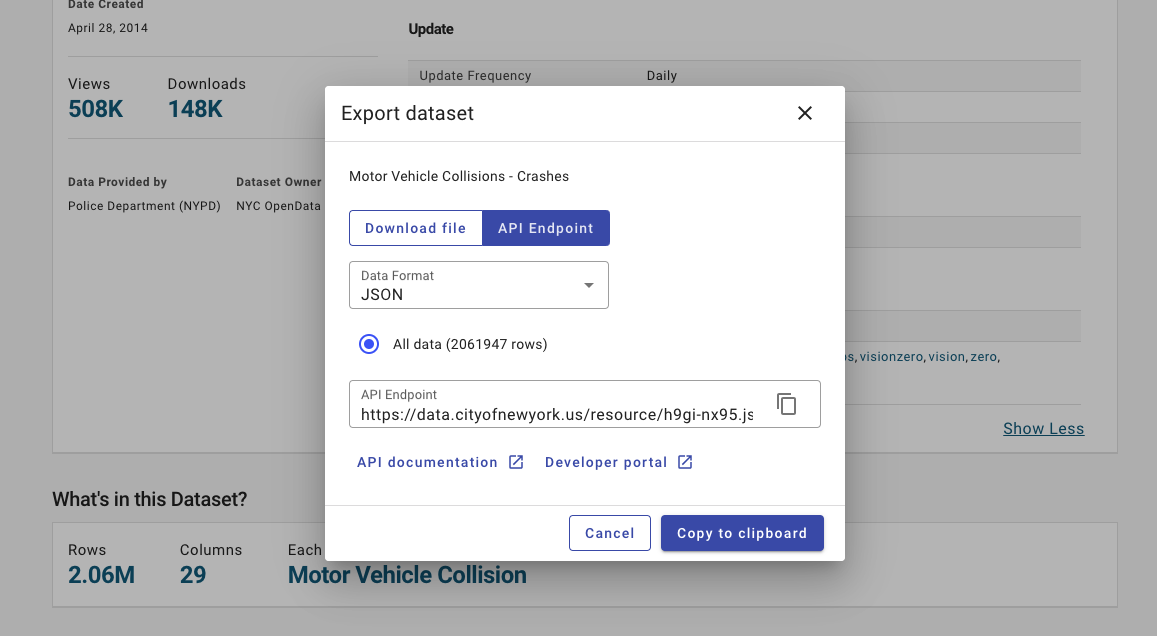
4. Customize the map by representing the data by `number_of_persons_killed` and `number_of_cyclist_killed`
5. Finally, calculate descriptive statistics for at least two attributes, such as `mean`, `standard deviation`, and other relevant measures 6. Justify/Describe the attribute selection.
7. Plot correlations between the chosen attributes and create `univariate` and/or `multivariate` charts to justify your insights.
   > Please take note that the dataset includes various numerical values. Hence, each student's attribute selection, justification, charts, and maps are expected to vary. 

# Datashader

Datashader is a graphics pipeline system for creating meaningful representations of large datasets quickly and flexibly. Datashader breaks the creation of images into a series of explicit steps that allow computations to be done on intermediate representations. 
There are other popular tools to represent big datasets like HoloViz; Datashader is included in this extended framework to allow researchers to represent millions of records.

## Why is mapping big data sets so complicated?

1. The speed. Plotting the 11 million data points from the below example using regular Python tools would be slow and may crash Jupyter kernel.
2. Image quality. In case a plotting library doesn't crash and you are willing to wait, it may still keep drawing each new data point as a circle or any other shape on top of each other, causing over-plotting. That is the main issue of plotting big data in GIS tools. Even if you add  transparency for overlapping points, it may not always help in this situation. Just imagine having many points displayed on top of each other on an image - what you would see it would become complicated to extract information from it.

**Datashader** provides an elegant and seemingly magic solution to these two obstacles. 


> Before you continue. I advise to save your work and **restart the kernel** as you must have a lot of your memory occupied.

Let's start with a simple example using data from the NYC Taxi data (https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

> For more info go to: https://examples.pyviz.org/nyc_taxi in here they use HoloViz, if time allow I will show you how to use that tool as well.

We need to make sure our Python env includes all the libraries we need. In a new terminal CD to your Working Directory/Repo and run 
`conda install holoviews hvplot datashader fastparquet python-snappy`

And then import packages:

In [ ]:
import holoviews as hv, pandas as pd, colorcet as cc
from holoviews.element.tiles import EsriImagery
from holoviews.operation.datashader import datashade
hv.extension('bokeh')

**Reading the data**:

For the very largest files, you will want to use a distributed processing library like **Dask with Datashader**, but here we have a **Parquet file** with “only” **11 million records**, which Datashader can easily handle on a laptop using Pandas without any special computing resources. Here you’ll load in two columns representing taxi drop-off locations.

In [ ]:
#GeoParquet is a helpful format for loading big data sets.

df = pd.read_parquet(
    'https://s3.amazonaws.com/datashader-data/nyc_taxi_wide.parq',
    columns = ['dropoff_x', 'dropoff_y']
)

In [ ]:
df.head() # This will take some time, you are loading more than 11M records.

In [ ]:
len(df)

**You have loaded 11M of records**, but now see how fast you will be able to plot all of them.

**Mapping**: 

Now we plot the data using **Datashader**. It only took four lines of code and six milliseconds to plot the 11 million rows of data, overlaid on a map of the New York area:

In [ ]:
%%time
map_tiles = EsriImagery().opts(alpha=0.5, width=900, height=480, bgcolor='black')
points = hv.Points(df, ['dropoff_x', 'dropoff_y'])
taxi_trips = datashade(points, cmap=cc.fire, width=900, height=480)
map_tiles * taxi_trips

Alternatively, instead of using **thedatashade function**, You could use **hvplot** with `rasterize=True` to apply rasterization using Datashader! 

I highly recommend using `hvplot` for your visualizations.

In [ ]:
import hvplot.pandas

map_tiles = EsriImagery().opts(alpha=0.5, width=900, height=480, bgcolor='black')
plot = df.hvplot(
    'dropoff_x',
    'dropoff_y',
    kind='scatter',
    rasterize=True,
    cmap=cc.fire,
    cnorm='eq_hist'
)
map_tiles * plot

You would then be able to `zoom in` to any region of this map, with the plot dynamically updating to use the full resolution for that zoom level.


**Datashader** turns your data into a plot using the five-step pipeline we discussed in the lecture.

You can find more information about how the pipeline works in each step on the Dashader Documentation site. (https://datashader.org/user_guide/Extending.html

1. Projection
2. Aggregation
3. Transformation
4. Colormapping and,
5. Embedding.

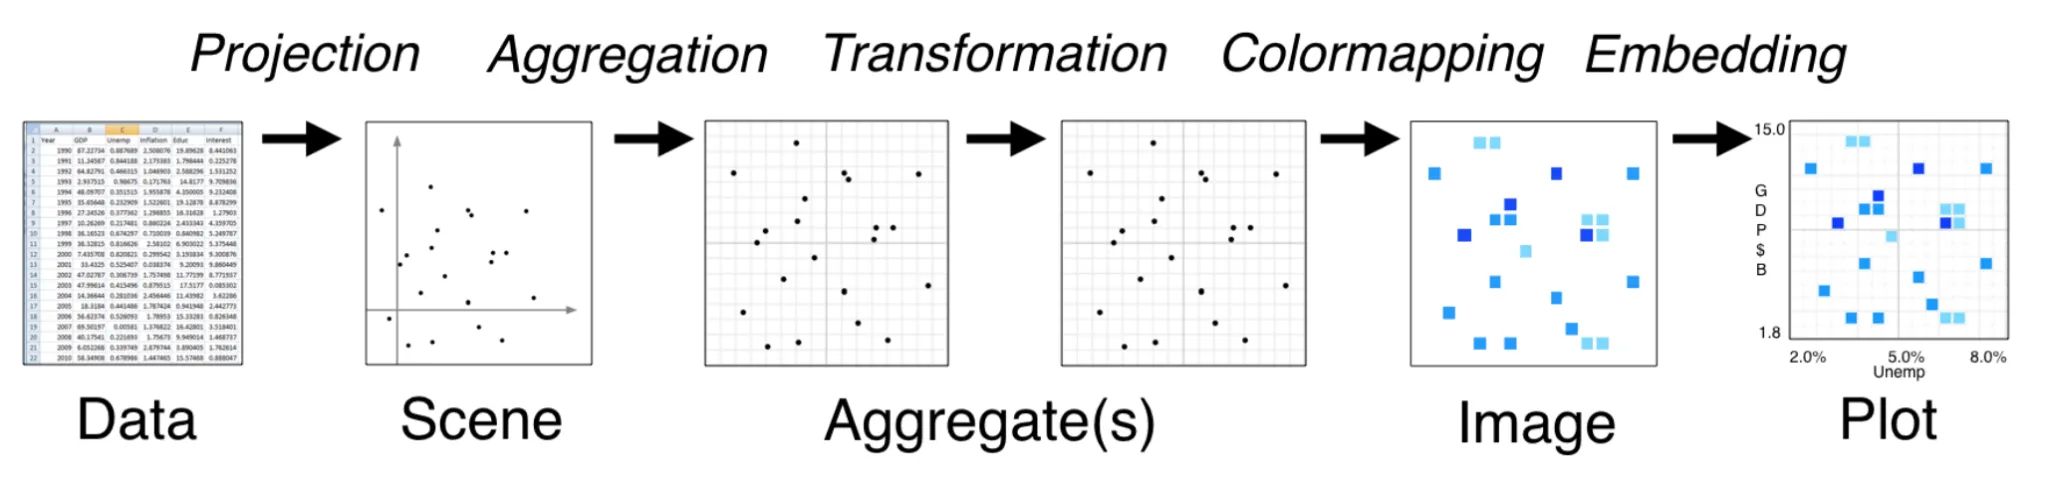
Fig 1. Datashader pipeline (Image from datashader.org).

Now we can break down each step you can see how the data is processed., Take some time to print and explore the outcomes.

In [ ]:
#Importing the required libraries.
import datashader as ds
import datashader.transfer_functions as tf
from holoviews.operation.datashader import rasterize

**Projection:** First, a 2D canvas is defined with width and height for the data to be projected onto.

The canvas defines **how many pixels** we would like to see in the final image, and optionally defines the `x_range` and `y_range` that will map to these pixels. 

In this particular scenario, the data ranges needed to plot are not specified in the Canvas. However, they will be automatically filled in the next step based on the maximum and minimum values of the data x and y in the given dataframe. The projection is defined by the Canvas, but for the sake of speed, each point is projected during the aggregation step.


In [ ]:
canvas = ds.Canvas(plot_width=900, plot_height=480)

**Agregation**: 

After we define the projected canvas, we project each point into the two-dimensional output grid and aggregate the results per pixel.

Datashader provides various options for data aggregation, but in this particular example, we are counting the number of data points projected into each pixel. To do this, we iterate through the data points and increment the pixel where the point lands. This creates a two-dimensional histogram that counts dropoffs per pixel.

In [ ]:
canvas.points(df, 'dropoff_x', 'dropoff_y', agg=ds.count())

**Transformation:** This is an optional step. 

The previous step has resulted in a fixed-size grid, regardless of the original dataset size. Once the data is in this grid, it can be transformed in any way desired, such as selecting a specific range of counts, masking data based on other datasets, or values, etc. In this case, the dropoff data ranges from zero in some pixels to tens of thousands in others. If we try to plot the grid directly, we would see only a few hotspots. Therefore, to make all the different levels visible, the data is transformed using the `image-processing` technique called **histogram equalization**. This technique reveals the distribution of the counts rather than their absolute values, making all the different levels visible, as seen in the image above.

Histogram equalization is actually folded into the colormapping step below, but we can do explicit transformations at this stage if we want, such as squaring the counts

In [ ]:
import numpy as np
np.power(canvas.points(df, 'dropoff_x', 'dropoff_y', agg=ds.count()),2)

**Color Mapping**

After the binning process, we can represent the binned grid data as an image. 

This is the key part, each bin value can be mapped to one of the 256 colors in a colormap, either through **linear interpolation** or an automatic transformation like applying the log function to each bin value, or using histogram equalization. 

In this example, we are using the "fire" colourmap from Colorcet. The colourmap starts with black for the lowest counts (1 and 2 dropoffs) and gradually shifts to red for higher values (in the hundreds), then yellow for even higher values (in the thousands), and finally white for the highest counts per pixel (in the tens of thousands, in this case). We set the background to black to enhance the visibility of the data.

Similar approach we did earlier with londboard

In [ ]:
import datashader.transfer_functions as tf
tf.set_background(
    tf.shade(
        canvas.points(df, 'dropoff_x', 'dropoff_y', agg=ds.count()),
        cmap=cc.fire),
    'black')

And **Embeedding:**

As you can see, Datashader only renders the data, not any axes, colour bars, or similar features you’d expect in a complete plot.

To add features that help interpret data, we can embed the images generated by Datashader into a plot. The easiest way to do this is to use **HoloViews**, which is a high-level plotting API that allows you to use `Matplotlib`, `Bokeh`, or `Plotly` as the backend. 

An example of using **HoloViews** to define a "points" object and then datashade all the points is shown below. Alternatively, you can use the **rasterize** method instead of **datashade** to let `Bokeh` handle the transformation and colormapping steps, enabling hover and colorbars to function properly.

In [ ]:
map_tiles = EsriImagery().opts(alpha=0.5, width=900, height=480, bgcolor='black')
points = hv.Points(df, ['dropoff_x', 'dropoff_y'])
ropts = dict(tools=['hover'], colorbar=True, colorbar_position='bottom', cmap=cc.fire, cnorm='eq_hist')
taxi_trips = rasterize(points).opts(**ropts)
map_tiles * taxi_trips

## Why Datashader is so fast?

Datashader is able to perform quickly because it uses **GeoParquet files**. If your data is in the form of JSON or CSV files, this can be memory-intensive. The Parquet file format is ideal for columnar data such as dropoff points, as it is compact, loads quickly, efficiently reads only the necessary columns and ranges, and supports distributed and out-of-core operation when required. 

The second reason for this fast representation is the combined **projection and aggregation** step. This step requires calculating values for millions of data points, but all subsequent calculations use the final fixed-size grid and are therefore much faster.


# Challenge 4

1. You worked with two modern libraries to map big data. Can you describe the differences between working with Longboard and Datashader? Which one provides the most exciting functionality, and how do the outcomes from both of them vary?
2. Find a large dataset with at least 5 million records. Consider open datasets, government datasets, or any dataset of interest to you. Ensure the dataset is in a format that can be easily loaded into a Pandas DataFrame (Parquet file or another format).
3. Define a potential problem or scenario for mapping this dataset.
4. Load the dataset into a Pandas DataFrame and explore its structure. Here, **I advice you! to take a small portion of that rather than work with the entire table.**
5. Identify key variables of interest that could be effectively visualized using Datashader(https://datashader.org/index.html#). (e.g. is fine if the datasets have only locations, but we are aiming for at least one additional variable to represent in the map. 
6. Use the previous steps and the Datashader documentation to implement a `hvplot` Map.
7. Discuss/Write any challenges you have encountered related to the challenges and how you addressed them.
8. As always. Provide clear comments and/or citations in your code, explaining each step of the Datashader implementation (**Note: You don't need to run the Datashader pipeline**)
   
9. **For next week**, create a **four-slide presentation** summarizing the problem, data source, dataset, challenges, map, and insights from visualizing the large dataset. **Two slides for Challenge 2** and the **other two for this challenge**. You can also use the Notebooks as a tool to make your presentation. 

# Finishing the Lab

Please ensure that you save all your code and upload the latest version of this notebook to your **GitHub repository**. Add also a PDF file with the presentation related to the T9 of challenge 4.

> Always check the size of your notebook before making any commit; make good use of the `.gitignore` to skip big data sets or undesired files.


# More resources

* [Stats Methods](http://www.statmethods.net/stats/descriptives.html) - some useful descriptions of various descriptive statistic methods / packages
* [Pandas cheat sheet](https://www.geeksforgeeks.org/pandas-cheat-sheet/) - lots of useful help and functions for working with spatial data
* [Urban Analytics Book](https://uk.sagepub.com/en-gb/eur/urban-analytics/book249267) - One of the most valuable and inital resources